# Climate Sentiment in 2022: Exploratory Data Analysis

## Overview

Which countries are more likely to be concerned about climate change? Does a given country's climate concern correlate with their CO<sub>2</sub> emissions and therefore their recorded influence on climate change?

To explore this question, datasets containing emissions data from 2021 and climate change opinion survey data from 2022 will be compared to see if there is alignment between these variables.

### Variables

1. **Total emissions:** The total CO<sub>2</sub> emissions that a given country produced over the course of a given year (here 2021).
2. **Climate happening:** Responses to the survey question "Climate change refers to the idea that the world's average temperature has been increasing over the past 150 years, will increase more in the future, and that the world's climate will change as a result. What do you think: Do you think that climate change is happening?" Responses to this question indicate whether recipients in a given country or territory agree that climate change is occurring (which is a foundational aspect of climate education).
3. **Climate awareness:** A survey question asked on Facebook in the year 2022 whose text read "How much do you know about climate change?" This variable allows respondents to self-report their perception of their own climate knowledge.
4. **Climate importance:** Responses to the survey question "How important is the issue of climate change to you personally?" This variable indicates how much climate change matters to the respondents.
5. **Threat over 20 years:** Responses to the survey question "Do you think that climate change is a very serious threat, a somewhat serious threat, or not a threat at all to the people in the country (or territory) where you live, over the next 20 years?" This question indicates the extent to which the person thinks their own country or territory will be affected by climate change, which is valuable to compare against emissions data.

### Limitations

- The climate change opinion survey was conducted through Facebook, which is unavailable in some countries, so analysis cannot be done on those countries.
- Country data is intrinsically very limited in scope (there are, even without limiting the scope, a maximum of ~195 countries from which data can be compared).
- Further analysis would benefit from comparisons of wealth (e.g. GDP, median income) or education metrics (e.g. science education, high school graduation or equivalent rates).

## Analysis


In [1]:
# Imports
import pandas as pd
import numpy as np
import scipy
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import thinkstats2
import thinkplot

In [2]:
# Read emissions dataset

def read_emissions_dataset(year=2021, dataset_filepath='./data/EmissionsByCountry.csv'):
    """Reads the emissions dataset and creates a dataframe
    comparing metrics across the given year.

    dataset_filepath: path to the emissions dataset
    year: the year for which to retrieve data
    returns: DataFrame
    """
    df = pd.read_csv(dataset_filepath)
    df = df.loc[df['Year'] == year]
    return df


In [3]:
emissions = read_emissions_dataset()
emissions.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
271,Afghanistan,AFG,2021,11.874211,4.203536,7.419570,0.238847,0.012259,0.000000,NaN,0.296119
543,Albania,ALB,2021,4.619109,0.174413,3.246273,0.150245,1.048179,0.000000,NaN,1.618066
815,Algeria,DZA,2021,176.269070,1.095536,56.020598,92.791955,11.028039,15.332942,NaN,3.989977
1087,Andorra,AND,2021,0.452888,0.000000,0.452888,0.000000,0.000000,0.000000,NaN,5.730292
1359,Angola,AGO,2021,21.362717,0.000000,13.901716,2.951298,1.123730,3.385974,NaN,0.619141


In [4]:
# Read climate change opinion dataset

def read_climate_opinion_dataset(dataset_filepath='./data/ClimateChangeOpinionSurvey2022_Transformed.xlsx',
                                 sheet_name='transformed_data'):
    """Reads the climate change opinion survey dataset
    and creates a custom dataframe from it.

    dataset_filepath: path to the climate change opinion dataset
    returns: DataFrame
    """
    df = pd.read_excel(dataset_filepath, sheet_name=sheet_name)
    return df


In [5]:
# Join the two datasets
def read_dataset():
    emissions_df = read_emissions_dataset()
    co_df = read_climate_opinion_dataset()
    df = co_df.merge(emissions, on='Country')
    df['climate_happening'] = df['climate_happening_Yes']
    df['climate_awareness'] = (df['climate_awareness_Moderate'] + df['climate_awareness_Lot'])
    df['climate_importance'] = (df['climate_importance_Extremely'] + df['climate_importance_Very'])
    df['threat_20_years'] = (df['threat_20_years_Very'] + df['threat_20_years_Somewhat'])
    df['total_emissions'] = df['Total']
    return df


In [6]:
# Get working df
df = read_dataset()
df.head()

,Country,climate_happening_Yes,climate_awareness_Moderate,climate_awareness_Lot,climate_importance_Extremely,climate_importance_Very,climate_importance_Somewhat,climate_importance_NotAtAll,threat_20_years_Very,threat_20_years_Somewhat,...,Gas,Cement,Flaring,Other,Per Capita,climate_happening,climate_awareness,climate_importance,threat_20_years,total_emissions
0,Albania,81.971489,33.120704,10.607604,17.168798,42.592327,26.310751,6.816715,39.939198,40.643615,...,0.150245,1.048179,0.000000,NaN,1.618066,81.971489,43.728308,59.761125,80.582813,4.619109
1,Algeria,74.430033,25.990305,11.059572,18.062330,27.460935,29.513860,12.967839,37.523962,28.787808,...,92.791955,11.028039,15.332942,NaN,3.989977,74.430033,37.049877,45.523265,66.311770,176.269070
2,Angola,90.638354,23.470336,11.147758,47.560671,38.737759,7.981600,2.068597,48.921904,28.477133,...,2.951298,1.123730,3.385974,NaN,0.619141,90.638354,34.618094,86.298430,77.399037,21.362717
3,Argentina,90.837281,43.783706,9.878085,17.061947,44.834983,26.647174,7.496725,50.366367,31.285686,...,94.327529,4.670734,2.324770,NaN,4.117967,90.837281,53.661791,61.896930,81.652053,186.448284
4,Armenia,87.864631,25.828192,11.439214,6.234639,33.169577,29.168191,22.489247,19.446516,55.840085,...,5.460901,0.341102,0.000000,NaN,2.438591,87.864631,37.267405,39.404216,75.286601,6.806045


### Emissions by country

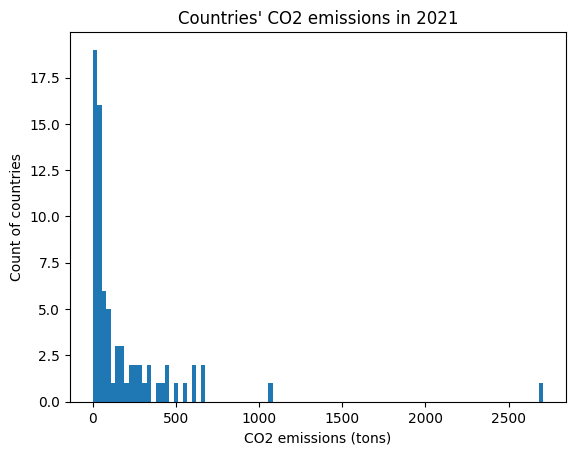

In [7]:
# Show histogram of CO2 emissions
emissions = np.floor(df.total_emissions)
emissions_hist = thinkstats2.Hist(emissions, label='emissions')
num_bins = 100
n, bins, patches = plt.hist(emissions_hist, num_bins)
plt.xlabel('CO2 emissions (tons)')
plt.ylabel('Count of countries')
plt.title('Countries\' CO2 emissions in 2021')
plt.show()

In [8]:
# Mean, median, mode, min, max
mean = df.total_emissions.mean()
median = df.total_emissions.median()
mode = df.total_emissions.mode()[0]
maximum = df.total_emissions.max()
minimum = df.total_emissions.min()
spread = maximum - minimum
print(f"Mean:   {mean}\nMedian: {median}\nMode:   {mode}\nSpread: {spread}")

Mean:   155.72560704040404
Median: 38.492804
Mode:   0.0
Spread: 2709.683625


### Sentiment on whether climate change is happening

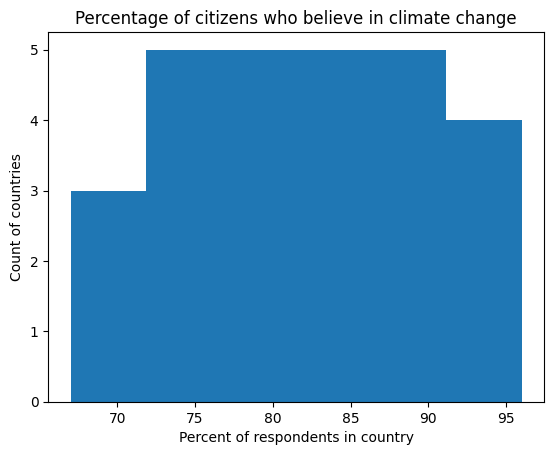

In [9]:
# Show histogram of percentage of respondents per country who believe climate change is happening
happening = np.floor(df.climate_happening)
happening_hist = thinkstats2.Hist(happening, label='climate_happening')
num_bins = 6
n, bins, patches = plt.hist(happening_hist, num_bins)
plt.xlabel('Percent of respondents in country')
plt.ylabel('Count of countries')
plt.title('Percentage of citizens who believe in climate change')
plt.show()

In [10]:
# Mean, median, mode
mean = df.climate_happening.mean()
median = df.climate_happening.median()
mode = df.climate_happening.mode()[0]
maximum = df.climate_happening.max()
minimum = df.climate_happening.min()
spread = maximum - minimum
print(f"Mean:   {mean}\nMedian: {median}\nMode:   {mode}\nSpread: {spread}")
print(maximum)

Mean:   85.04075518056648
Median: 87.224606189653
Mode:   67.4207066072989
Spread: 28.63648245970721
96.0571890670061


### Sentiment on how respondents would assess their own knowledge of climate change

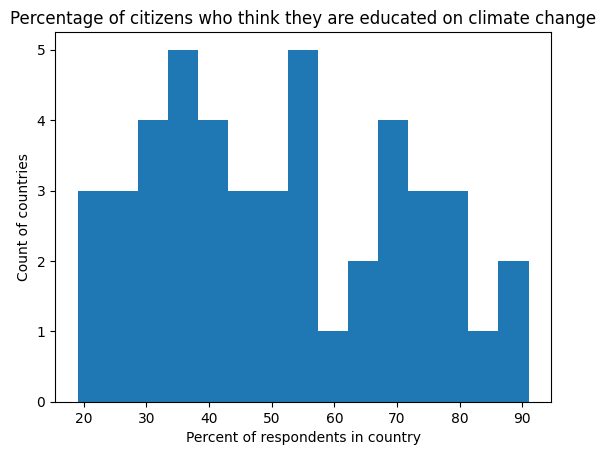

In [11]:
# Show histogram of climate_awareness
awareness = np.floor(df.climate_awareness)
awareness_hist = thinkstats2.Hist(awareness, label='climate_awareness')
num_bins = 15
n, bins, patches = plt.hist(awareness_hist, num_bins)
plt.xlabel('Percent of respondents in country')
plt.ylabel('Count of countries')
plt.title('Percentage of citizens who think they are educated on climate change')
plt.show()

In [12]:
# Mean, median, mode
mean = df.climate_awareness.mean()
median = df.climate_awareness.median()
mode = df.climate_awareness.mode()[0]
maximum = df.climate_awareness.max()
minimum = df.climate_awareness.min()
spread = maximum - minimum
print(f"Mean:   {mean}\nMedian: {median}\nMode:   {mode}\nSpread: {spread}")

Mean:   49.900714912245164
Median: 43.698180332795694
Mode:   19.303088361850378
Spread: 72.41955224780031


### Sentiment on whether climate change is important

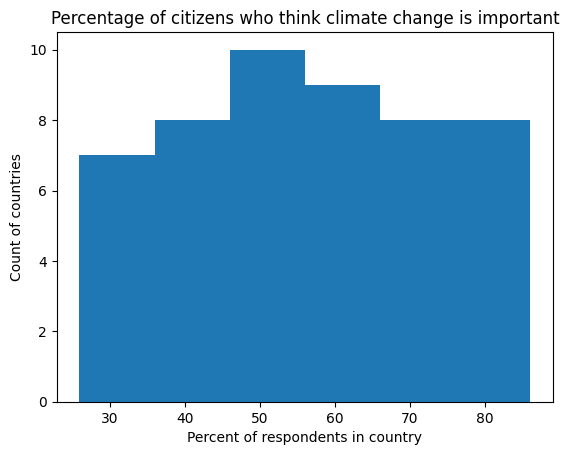

In [13]:
# Show histogram of climate_importance
importance = np.floor(df.climate_importance)
importance_hist = thinkstats2.Hist(importance, label='climate_importance')
num_bins = 6
n, bins, patches = plt.hist(importance_hist, num_bins)
plt.xlabel('Percent of respondents in country')
plt.ylabel('Count of countries')
plt.title('Percentage of citizens who think climate change is important')
plt.show()

In [14]:
# Mean, median, mode
mean = df.climate_importance.mean()
median = df.climate_importance.median()
mode = df.climate_importance.mode()[0]
maximum = df.climate_importance.max()
minimum = df.climate_importance.min()
spread = maximum - minimum
print(f"Mean:   {mean}\nMedian: {median}\nMode:   {mode}\nSpread: {spread}")
print(maximum)

Mean:   59.72431272550612
Median: 60.6956180515362
Mode:   26.435921330550002
Spread: 59.862508679924105
86.2984300104741


### Sentiment on whether climate change poses a threat within 20 years

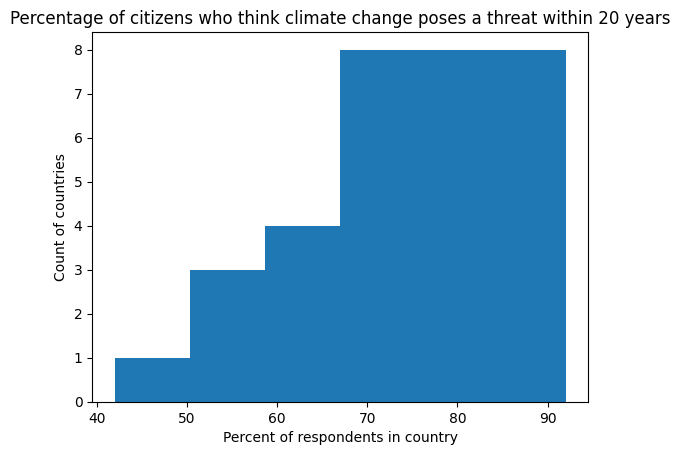

In [15]:
# Show histogram of threat_20_years
threat_20_years = np.floor(df.threat_20_years)
threat_20_years_hist = thinkstats2.Hist(threat_20_years, label='threat_20_years')
num_bins = 6
n, bins, patches = plt.hist(threat_20_years_hist, num_bins)
plt.xlabel('Percent of respondents in country')
plt.ylabel('Count of countries')
plt.title('Percentage of citizens who think climate change poses a threat within 20 years')
plt.show()

In [16]:
# Mean, median, mode
mean = df.threat_20_years.mean()
median = df.threat_20_years.median()
mode = df.threat_20_years.mode()[0]
maximum = df.threat_20_years.max()
minimum = df.threat_20_years.min()
spread = maximum - minimum
print(f"Mean:   {mean}\nMedian: {median}\nMode:   {mode}\nSpread: {spread}")

Mean:   77.60412909553352
Median: 79.051085758582
Mode:   42.4045699545454
Spread: 50.35133367144338


### PMF

Using a PMF, the countries that produce the most emissions (at or above the 75th percentile) will be compared with those that produce the least (at or below the 25th percentile).

In [17]:
# "High" and "low" thresholds sorted according to percentile
high_emission_threshold = np.percentile(df.total_emissions, 75)
low_emission_threshold = np.percentile(df.total_emissions, 25)

In [18]:
# Sub-df of countries that have high emissions
df_high = df.loc[df['total_emissions'] >= high_emission_threshold]
df_high.head()

,Country,climate_happening_Yes,climate_awareness_Moderate,climate_awareness_Lot,climate_importance_Extremely,climate_importance_Very,climate_importance_Somewhat,climate_importance_NotAtAll,threat_20_years_Very,threat_20_years_Somewhat,...,Gas,Cement,Flaring,Other,Per Capita,climate_happening,climate_awareness,climate_importance,threat_20_years,total_emissions
3,Argentina,90.837281,43.783706,9.878085,17.061947,44.834983,26.647174,7.496725,50.366367,31.285686,...,94.327529,4.670734,2.324770,NaN,4.117967,90.837281,53.661791,61.896930,81.652053,186.448284
5,Australia,82.705546,48.100425,23.948061,24.020063,25.202018,26.053744,15.543621,42.674751,35.222495,...,77.242144,2.820162,17.272753,3.738217,15.091473,82.705546,72.048487,49.222081,77.897246,391.187411
13,Brazil,90.337536,52.426813,12.577279,37.333995,36.817014,14.824915,6.569033,66.444059,20.581303,...,75.974385,23.792942,17.505000,6.392000,2.281014,90.337536,65.004092,74.151010,87.025362,488.881070
18,Canada,87.929027,51.495742,22.369045,20.936326,31.091482,26.360502,15.085700,44.125865,37.968764,...,235.381822,6.624708,16.056983,2.049271,14.300468,87.929027,73.864787,52.027809,82.094629,545.634517
27,Egypt,74.619269,27.048837,7.864145,11.142832,22.284768,34.017831,15.611252,21.396867,37.707406,...,126.313455,16.155578,3.915025,NaN,2.284635,74.619269,34.912982,33.427601,59.104273,249.624151


In [19]:
# Sub-df of countries that have low emissions
df_low = df.loc[df['total_emissions'] <= low_emission_threshold]
df_low.head()

,Country,climate_happening_Yes,climate_awareness_Moderate,climate_awareness_Lot,climate_importance_Extremely,climate_importance_Very,climate_importance_Somewhat,climate_importance_NotAtAll,threat_20_years_Very,threat_20_years_Somewhat,...,Gas,Cement,Flaring,Other,Per Capita,climate_happening,climate_awareness,climate_importance,threat_20_years,total_emissions
0,Albania,81.971489,33.120704,10.607604,17.168798,42.592327,26.310751,6.816715,39.939198,40.643615,...,0.150245,1.048179,0.0,NaN,1.618066,81.971489,43.728308,59.761125,80.582813,4.619109
4,Armenia,87.864631,25.828192,11.439214,6.234639,33.169577,29.168191,22.489247,19.446516,55.840085,...,5.460901,0.341102,0.0,NaN,2.438591,87.864631,37.267405,39.404216,75.286601,6.806045
10,Benin,79.047736,11.620303,13.572248,26.779950,37.266061,12.152137,6.863873,56.511442,17.031782,...,0.123021,0.387637,0.0,NaN,0.596744,79.047736,25.192551,64.046011,73.543224,7.755815
11,Bosnia and Herzegovina,91.611549,61.777998,11.257014,20.826532,32.439661,28.518044,14.042514,40.748326,40.139997,...,0.488297,0.365257,0.0,NaN,4.147523,91.611549,73.035012,53.266193,80.888323,13.566311
12,Botswana,89.738851,21.291452,17.550326,31.240114,43.521271,10.197946,8.715193,65.911187,16.336577,...,0.000000,0.000000,0.0,NaN,2.511150,89.738851,38.841778,74.761385,82.247763,6.499919


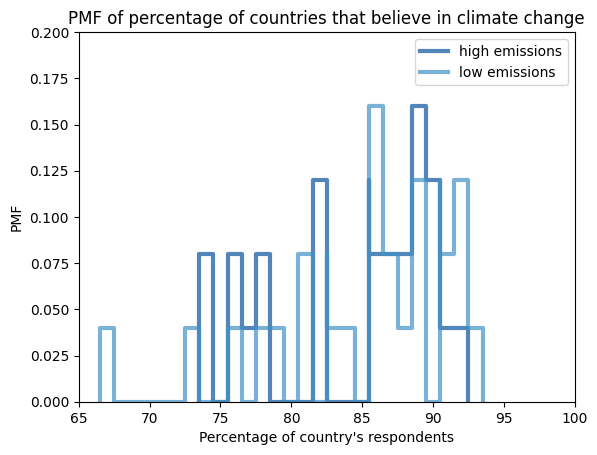

<Figure size 800x600 with 0 Axes>

In [20]:
pmf_high = thinkstats2.Pmf(np.floor(df_high.climate_happening), label='high emissions')
pmf_low = thinkstats2.Pmf(np.floor(df_low.climate_happening), label='low emissions')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_high, pmf_low])
thinkplot.Show(xlabel='Percentage of country\'s respondents',
               ylabel='PMF',
               title='PMF of percentage of countries that believe in climate change',
               axis=[65, 100, 0, 0.2])

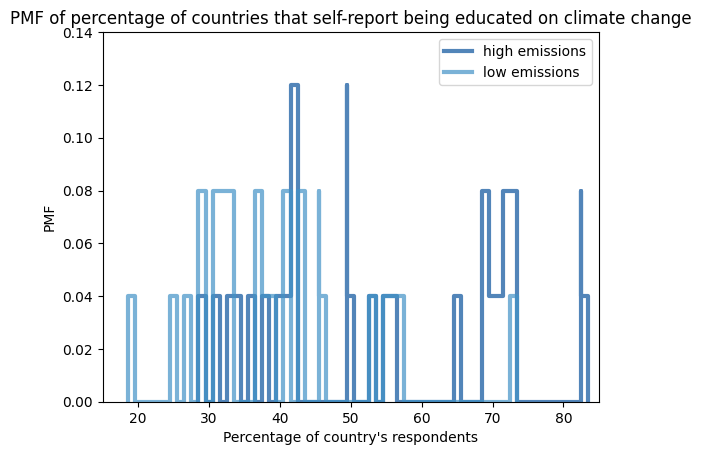

<Figure size 800x600 with 0 Axes>

In [21]:
pmf_high = thinkstats2.Pmf(np.floor(df_high.climate_awareness), label='high emissions')
pmf_low = thinkstats2.Pmf(np.floor(df_low.climate_awareness), label='low emissions')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_high, pmf_low])
thinkplot.Show(xlabel='Percentage of country\'s respondents',
               ylabel='PMF',
               title='PMF of percentage of countries that self-report being educated on climate change',
               axis=[15, 85, 0, 0.14])

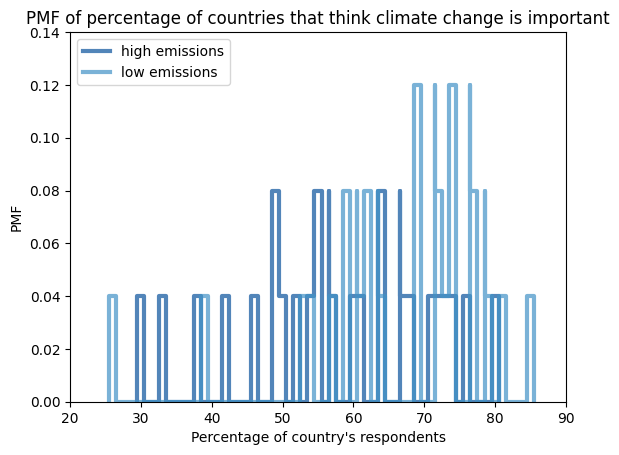

<Figure size 800x600 with 0 Axes>

In [22]:
pmf_high = thinkstats2.Pmf(np.floor(df_high.climate_importance), label='high emissions')
pmf_low = thinkstats2.Pmf(np.floor(df_low.climate_importance), label='low emissions')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_high, pmf_low])
thinkplot.Show(xlabel='Percentage of country\'s respondents',
               ylabel='PMF',
               title='PMF of percentage of countries that think climate change is important',
               axis=[20, 90, 0, 0.14])

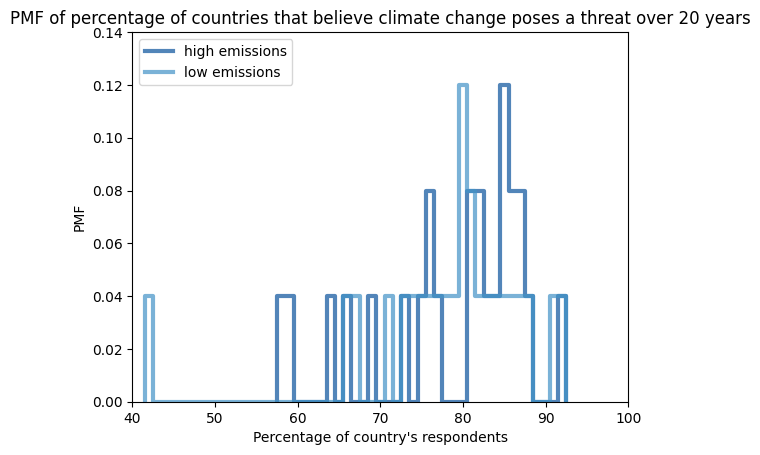

<Figure size 800x600 with 0 Axes>

In [23]:
pmf_high = thinkstats2.Pmf(np.floor(df_high.threat_20_years), label='high emissions')
pmf_low = thinkstats2.Pmf(np.floor(df_low.threat_20_years), label='low emissions')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_high, pmf_low])
thinkplot.Show(xlabel='Percentage of country\'s respondents',
               ylabel='PMF',
               title='PMF of percentage of countries that believe climate change poses a threat over 20 years',
               axis=[40, 100, 0, 0.14])

### CDF

CDFs are a better analytical tool for this scenario because of the number of values.

A CDF approach will be used using the same scenario, comparing low- and high-emission countries.

From the disparities between the high- and low-emission groups in the PMF comparisons, the **education** and **importance** variables show the most disparity and therefore are of the most interest, for now, as potential predictors.

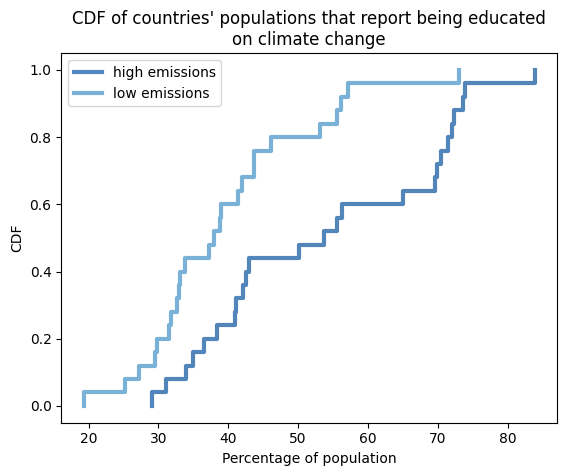

<Figure size 800x600 with 0 Axes>

In [24]:
high_cdf = thinkstats2.Cdf(df_high.climate_awareness, label='high emissions')
low_cdf = thinkstats2.Cdf(df_low.climate_awareness, label='low emissions')

thinkplot.PrePlot(2)
thinkplot.Cdfs([high_cdf, low_cdf])
thinkplot.Show(xlabel='Percentage of population',
               ylabel='CDF',
               title='CDF of countries\' populations that report being educated\non climate change')

The CDF here shows a much more clear disparity in sentiment between high- and low-emission countries. Low-emission countries are visibly much less likely to self-report being educated on the topic of climate change.

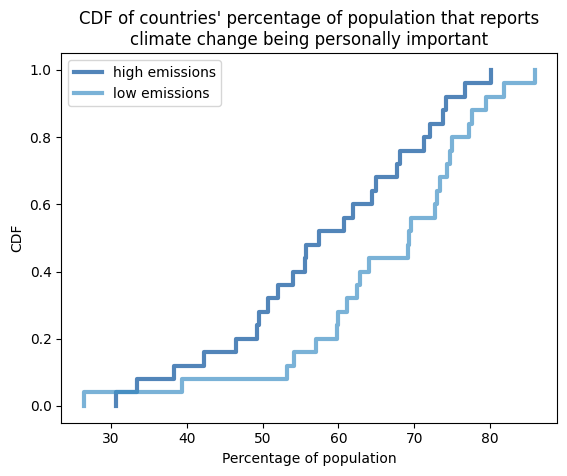

<Figure size 800x600 with 0 Axes>

In [25]:
high_cdf = thinkstats2.Cdf(df_high.climate_importance, label='high emissions')
low_cdf = thinkstats2.Cdf(df_low.climate_importance, label='low emissions')

thinkplot.PrePlot(2)
thinkplot.Cdfs([high_cdf, low_cdf])
thinkplot.Show(xlabel='Percentage of population',
               ylabel='CDF',
               title='CDF of countries\' percentage of population that reports\nclimate change being personally important')

On the other hand, the other two variables, which I expected to be less promising, do indeed have less clear CDFs:

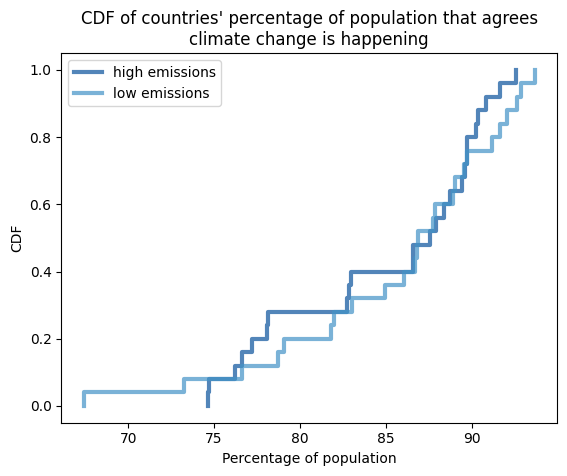

<Figure size 800x600 with 0 Axes>

In [26]:
high_cdf = thinkstats2.Cdf(df_high.climate_happening, label='high emissions')
low_cdf = thinkstats2.Cdf(df_low.climate_happening, label='low emissions')

thinkplot.PrePlot(2)
thinkplot.Cdfs([high_cdf, low_cdf])
thinkplot.Show(xlabel='Percentage of population',
               ylabel='CDF',
               title='CDF of countries\' percentage of population that agrees\nclimate change is happening')

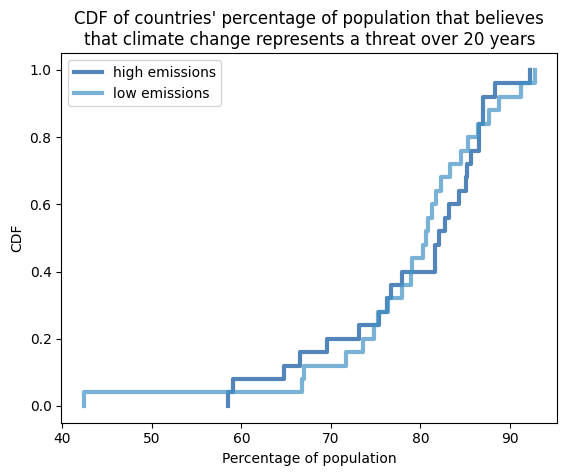

<Figure size 800x600 with 0 Axes>

In [27]:
high_cdf = thinkstats2.Cdf(df_high.threat_20_years, label='high emissions')
low_cdf = thinkstats2.Cdf(df_low.threat_20_years, label='low emissions')

thinkplot.PrePlot(2)
thinkplot.Cdfs([high_cdf, low_cdf])
thinkplot.Show(xlabel='Percentage of population',
               ylabel='CDF',
               title='CDF of countries\' percentage of population that believes\nthat climate change represents a threat over 20 years')

The CDF of climate importance is equally clear compared to the PMF. Aside from the lower tail of the CDF plot, high-emission countries consistently report that climate change is less personally important to them.

This helps answer the question of whether climate change sentiment aligns with emissions: There *is* a clear disparity in sentiment between high- and low-emission countries.

- High-emission countries are **more likely to be educated on climate change**. This could be because of public education surrounding efforts to reduce or affect emissions.
- High-emission countries are **less likely to consider climate change personally important**. This could be for many reasons, e.g., perhaps high-emissions countries (which are more likely to have a high GDP) are wealthier and therefore more likely to be insulated from the personal effects of climate change, such as housing loss or the loss of agricultural jobs.

### Analytical Distribution

The climate change personal importance variable may have an approximately normal distribution, so a normal probability distribution will be plotted here for that variable:

In [28]:
def normal_plot_high_low(data_high, data_low):

    #high
    
    mean = data_high.mean()
    std = data_high.std()
    
    xs = [-3, 3]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='high emissions model')

    xs, ys = thinkstats2.NormalProbability(data_high)
    thinkplot.Plot(xs, ys, label='high emissions personal importance')

    #low

    mean = data_low.mean()
    std = data_low.std()

    xs = [-3, 3]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', alpha=0.2, label='low emissions model')

    xs, ys = thinkstats2.NormalProbability(data_low)
    thinkplot.Plot(xs, ys, label='low emissions personal importance')
    
    thinkplot.Config(xlabel='Standard deviation from mean',
                     ylabel='Percentage of population',
                     title='Personal concern about climate on normal distribution')


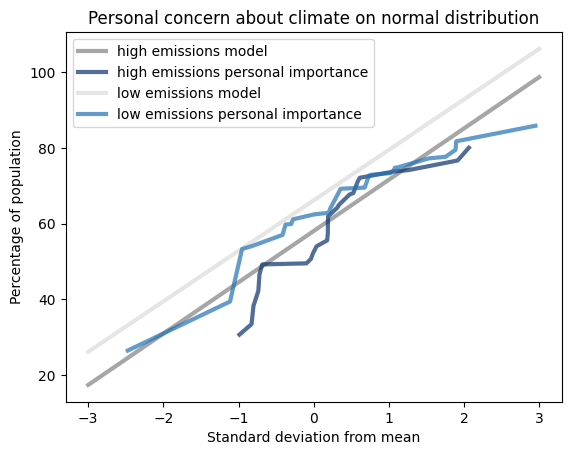

In [29]:
normal_plot_high_low(df_high.climate_importance,
                     df_low.climate_importance)

In [30]:
def normal_plot_all(data):

    mean = data.mean()
    std = data.std()
    
    xs = [-3, 3]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')

    xs, ys = thinkstats2.NormalProbability(data)
    thinkplot.Plot(xs, ys, label='personal importance')
    
    thinkplot.Config(xlabel='Standard deviation from mean',
                     ylabel='Percentage of population',
                     title='Personal concern about climate on normal distribution')

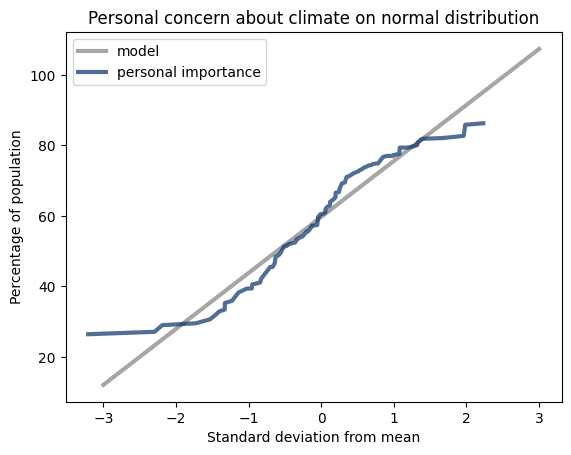

In [31]:
normal_plot_all(df.climate_importance)

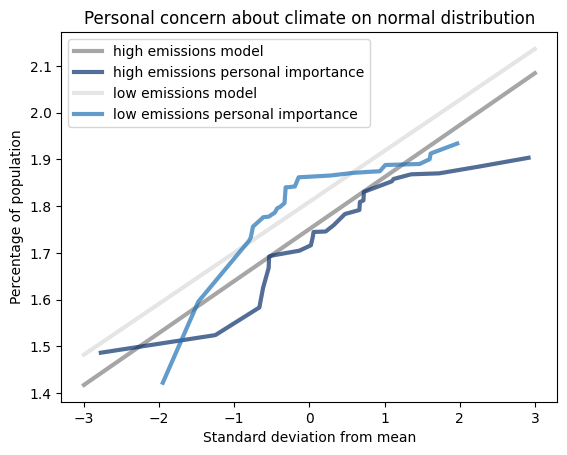

In [32]:
# Lognormal distribution
normal_plot_high_low(np.log10(df_high.climate_importance),
                     np.log10(df_low.climate_importance))

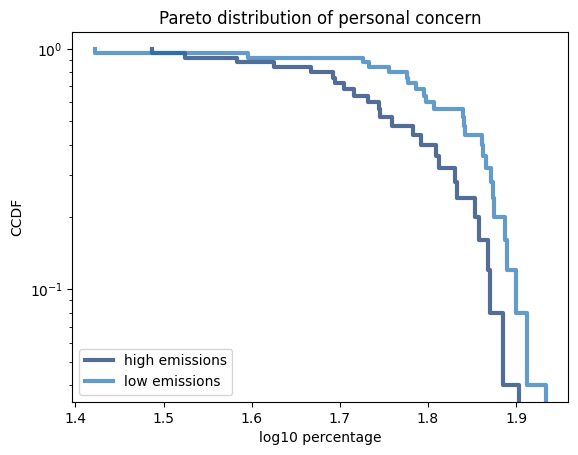

In [33]:
# Pareto distribution
def plot_pareto(data_high, data_low):
    cdf_log_high = thinkstats2.Cdf(data_high, label='high emissions')
    cdf_log_low = thinkstats2.Cdf(data_low, label='low emissions')
    
    thinkplot.Cdfs([cdf_log_high, cdf_log_low], complement=True)
    thinkplot.Config(
        xlabel="log10 percentage", ylabel="CCDF", yscale="log", loc="lower left", title="Pareto distribution of personal concern"
    )

plot_pareto(np.log10(df_high.climate_importance),
            np.log10(df_low.climate_importance))


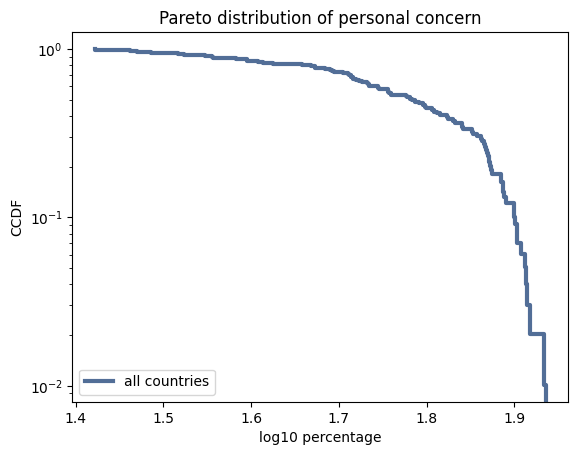

In [34]:
# Pareto distribution
def plot_pareto_all_countries(data):
    cdf_log = thinkstats2.Cdf(data, label='all countries')
    
    thinkplot.Cdf(cdf_log, complement=True)
    thinkplot.Config(
        xlabel="log10 percentage", ylabel="CCDF", yscale="log", loc="lower left", title="Pareto distribution of personal concern"
    )

plot_pareto_all_countries(np.log10(df.climate_importance))


Reviewing the potential distribution models, the normal distribution is the best fit.

Normal distribution can be expected in this scenario, but the necessarily small sample size of countries causes enough noise to throw this model into doubt. However, modeling all countries (see previous slide) as opposed to the high- and low-emissions countries (see right) uses a larger body of data and therefore a more regular, “smooth” model. This indicates that a normal distribution is accurate, which can be expected from survey data. 

### Scatter Plots

The best way to visually compare the relationship between climate sentiment and emissions is through scatter plots. Here, scatter plots will be used to compare:
- total CO2 emissions and countries’ percentage of personal concern about climate change
- total CO2 emissions and countries’ percentage of education on climate change

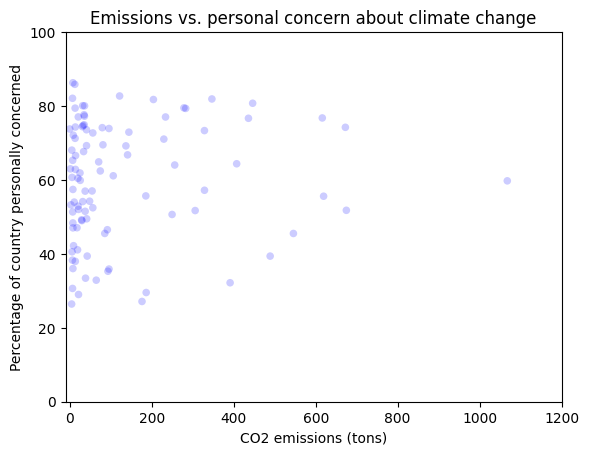

<Figure size 800x600 with 0 Axes>

In [35]:
thinkplot.Scatter(df.total_emissions, df.climate_importance)
thinkplot.Show(xlabel='CO2 emissions (tons)',
               ylabel='Percentage of country personally concerned',
               title='Emissions vs. personal concern about climate change',
               axis=[-10, 1200, 0, 100])

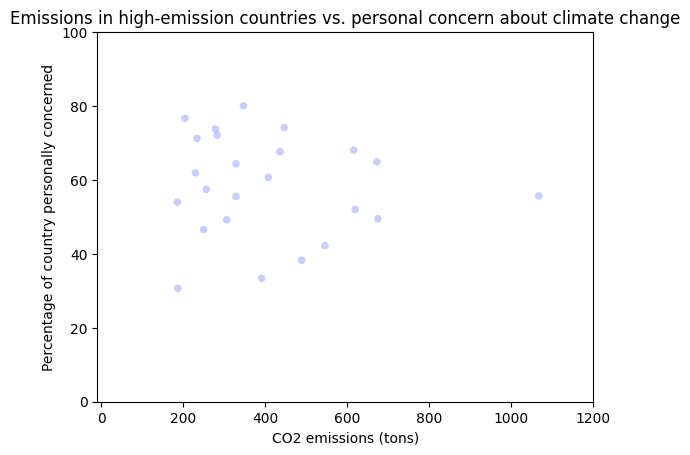

<Figure size 800x600 with 0 Axes>

In [36]:
thinkplot.Scatter(df_high.total_emissions, df_high.climate_importance)
thinkplot.Show(xlabel='CO2 emissions (tons)',
               ylabel='Percentage of country personally concerned',
               title='Emissions in high-emission countries vs. personal concern about climate change',
               axis=[-10, 1200, 0, 100])

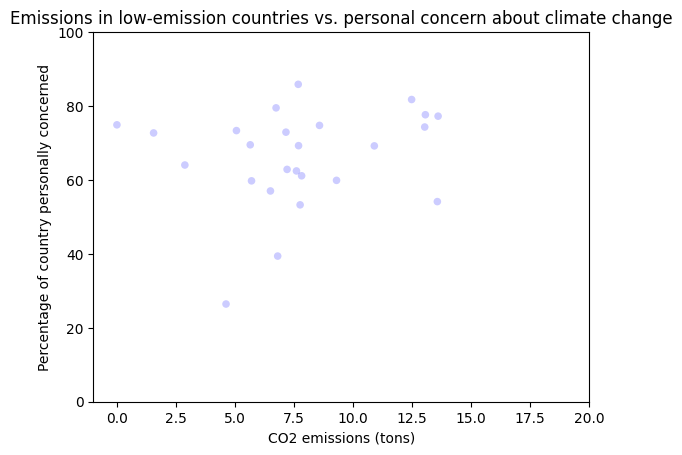

<Figure size 800x600 with 0 Axes>

In [37]:
thinkplot.Scatter(df_low.total_emissions, df_low.climate_importance)
thinkplot.Show(xlabel='CO2 emissions (tons)',
               ylabel='Percentage of country personally concerned',
               title='Emissions in low-emission countries vs. personal concern about climate change',
               axis=[-1, 20, 0, 100])

Contrary to the CDF analysis, scatter plots do not easily indicate a clear correlation between emissions and personal concern about climate change.

The mean of all countries' personal importance is 60%, which can be compared to the high- and low-emission breakouts' means of 58% and 66% respectively.

*The scatter plots have had one (>2500 CO2et) outlier removed for readability.*

In [38]:
# All countries
cov = thinkstats2.Cov(df.total_emissions, df.climate_importance)
pcorr = thinkstats2.Corr(df.total_emissions, df.climate_importance)
scorr = thinkstats2.SpearmanCorr(df.total_emissions, df.climate_importance)

print(f"Covariance:             {cov}\nPearson's correlation:  {pcorr}\nSpearman's correlation: {scorr}")

Covariance:             122.42325837098086
Pearson's correlation:  0.02417542309016987
Spearman's correlation: 0.10232529375386519


In [39]:
# High-emission countries
cov = thinkstats2.Cov(df_high.total_emissions, df_high.climate_importance)
pcorr = thinkstats2.Corr(df_high.total_emissions, df_high.climate_importance)
scorr = thinkstats2.SpearmanCorr(df_high.total_emissions, df_high.climate_importance)

print(f"Covariance:             {cov}\nPearson's correlation:  {pcorr}\nSpearman's correlation: {scorr}")

Covariance:             -925.2824172071824
Pearson's correlation:  -0.1410963585169736
Spearman's correlation: -0.12538461538461537


In [40]:
# Low-emission countries
cov = thinkstats2.Cov(df_low.total_emissions, df_low.climate_importance)
pcorr = thinkstats2.Corr(df_low.total_emissions, df_low.climate_importance)
scorr = thinkstats2.SpearmanCorr(df_low.total_emissions, df_low.climate_importance)

print(f"Covariance:             {cov}\nPearson's correlation:  {pcorr}\nSpearman's correlation: {scorr}")

Covariance:             8.489548513752771
Pearson's correlation:  0.18388771274816532
Spearman's correlation: 0.17230769230769233


For the purposes of analysis, correlation is more useful here, and Spearman’s correlation more valuable because of the significant presence of outliers in the dataset. A positive correlation of ~0.1 indicates that emissions have a very minor predictive effect for personal concern, or vice versa.

It is difficult to determine the direction of potential causation with this data, however. It may be said that emissions have an effect on a given citizen's climate concern because of emissions' effect as a public concern. On the other hand, it may be said that climate concern has an effect on emissions because it drives political action and legislation. Further insight on a longer time frame is necessary.

### Hypothesis Test

For hypothesis testing, a correlation testing methodology using Spearman's correlation in an implementation of `thinkstats2.HypothesisTest` will be used:

In [41]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.SpearmanCorr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys


In [42]:
data = df.total_emissions.values, df.climate_importance.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.324

### Regression Analysis

Finally, to execute a regression analysis on these variables and determine whether a model is applicable that predicts climate concern from a country's CO2 emissions, an OLS model will be constructed from `statsmodels` using the method of least squares:

In [43]:
formula = 'climate_awareness ~ total_emissions'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      climate_awareness   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8526
Date:                Thu, 27 Feb 2025   Prob (F-statistic):              0.358
Time:                        20:12:17   Log-Likelihood:                -425.33
No. Observations:                  99   AIC:                             854.7
Df Residuals:                      97   BIC:                             859.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          49.0909      2.006     24.474      0.000      45.110      53.072
total_emissions     0.0052      0.006      0.923      0.358      -0.006       0.016
==============================================================================
Omnibus:                       12.424   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.184
Skew:                           0.491   Prob(JB):                       0.0275
Kurtosis:                       2.118   Cond. No.                         396.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
inter = results.params['Intercept']
slope = results.params['total_emissions']
fit_xs, fit_ys = thinkstats2.FitLine(df.total_emissions, inter, slope)

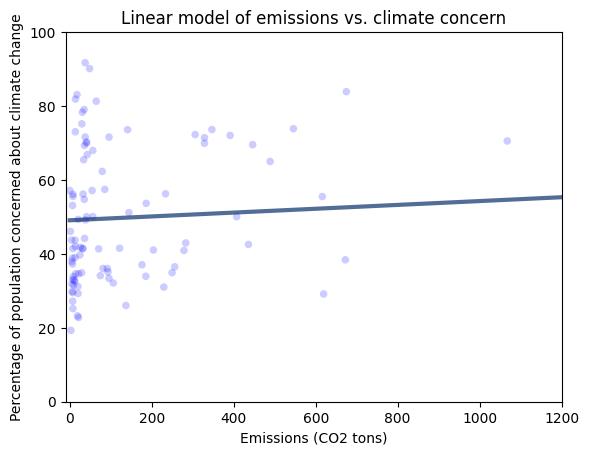

In [45]:
thinkplot.Scatter(df.total_emissions, df.climate_awareness)
thinkplot.Plot(fit_xs, fit_ys)
thinkplot.Config(xlabel='Emissions (CO2 tons)',
                 ylabel='Percentage of population concerned about climate change',
                 title='Linear model of emissions vs. climate concern',
                 axis=[-10, 1200, 0, 100])

While there is a marginally positive slope, as expected, this model shows that the p-value of the emissions variable is fairly high at 0.358.

Additionally, while the slope is centered on the scatter plot, the majority of the points do not align with the slope.

Therefore, emissions likely have low predictive power against climate concern.

## Conclusions

In this exploratory data analysis project, country emissions data and country-wide climate opinion survey data was used to attempt to determine whether a country's CO<sub>2</sub> emissions have an effect upon climate opinion.

The exploratory analysis is inconclusive. The most promising variables that differ strongly between high- and low-emission countries are whether or not citizens were likely to report that they were well-educated on climate change, and whether citizens were likely to be personally concerned about climate change. High-emission countries' populations are more likely to have populations that report being educated on climate change, while low-emission countries' populations are more likely to report being personally concerned about its effects.

However, emissions appear to have minimal predictive power for either of these variables, or vice versa.

I predicted that there would be a significant disparity between high- and low-emission countries and the percentage of their populations that agreed that climate change was occurring. However, not only does this disparity not exist, but even the lowest reported percentage of a country that agrees that climate change is occurring still represents a majority of the country. Other variables presented a more apparent disparity.

One of the primary challenges of working with country data is the necessarily low number of data points available for analysis. It would be valuable to reattempt this analysis on data that is further divided into subregions. Having such a limited dataset presents problems while attempting to fit the data to a distribution model, and ultimately presented some very ill-fit data.

Additionally, further research comparing climate sentiment and wealth, e.g. through GDP, may be valuable as this is one of the most prominent divisions between high- and low-emission countries. Further analyses may also benefit from focusing on climate education efforts and political movements, such as the presence of climate action movements or petroleum lobbies.